# Outlier Detection Unsupervised Algorithms

In [8]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

### 2nd hand 2 wheeler data

In [3]:
df = pd.read_csv('AnomalyDetection.csv') 

In [4]:
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [5]:
df['Mileage'] += 10

In [6]:
df.loc[df['Mileage'] <=20, 'Mileage']

4      15.608853
37     18.145891
109    13.037603
119    11.398964
184    19.743200
200    17.312213
209    14.980189
274    19.385704
432    17.175456
439    15.021021
443    17.043090
452    19.398712
499    16.277995
504    12.245049
566    16.087402
610    18.211729
646    12.981331
900    11.729261
901    15.892624
902    16.393027
903    15.584939
Name: Mileage, dtype: float64

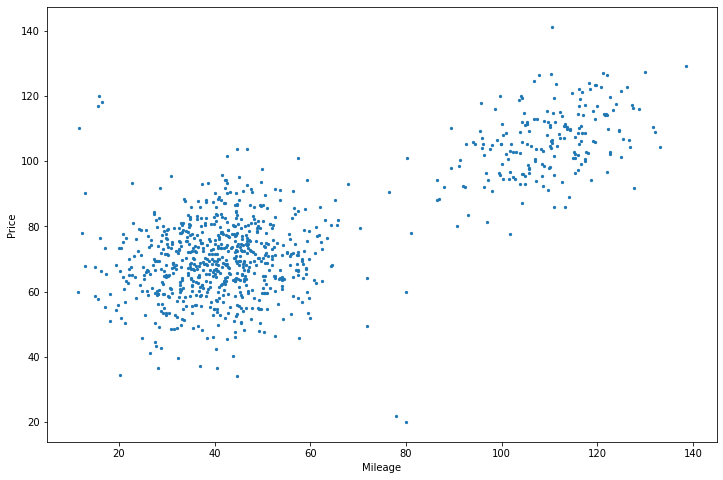

In [10]:
plt.scatter(df['Mileage'],df['Price'], s=5)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Elliptic Envelope

### On First cluster

In [8]:
less_dense = df.loc[df['Mileage'] <= 80]

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_19150/2826687757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_dense['is_outlier_ee'] = label


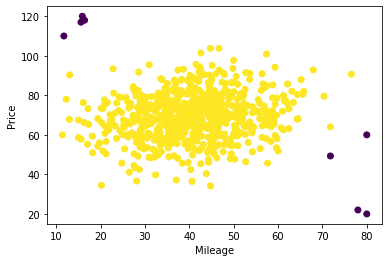

In [9]:
label = EllipticEnvelope(random_state=0, contamination=0.01).fit_predict(less_dense.iloc[:,:2])
less_dense['is_outlier_ee'] = label



# Plotting
plt.scatter(less_dense['Mileage'], less_dense['Price'], c=less_dense['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

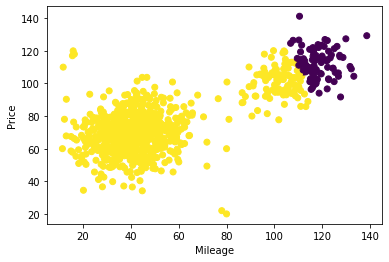

In [10]:
cov = EllipticEnvelope(random_state=0).fit_predict(df.iloc[:,:2])
df['is_outlier_ee'] = cov
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [11]:
df['is_outlier_ee'].value_counts()

 1    817
-1     91
Name: is_outlier_ee, dtype: int64

## Isolation Forest

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


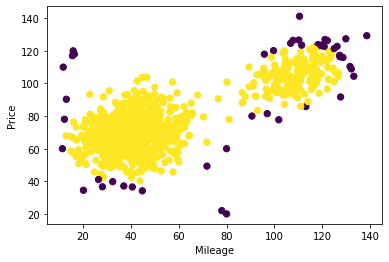

In [13]:
clf = IsolationForest(contamination = 0.05, random_state=0, n_estimators=1000).fit_predict(df.iloc[:, :2])


df['is_outlier_if'] = clf
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [14]:
df['is_outlier_if'].value_counts()

 1    862
-1     46
Name: is_outlier_if, dtype: int64

## LOF

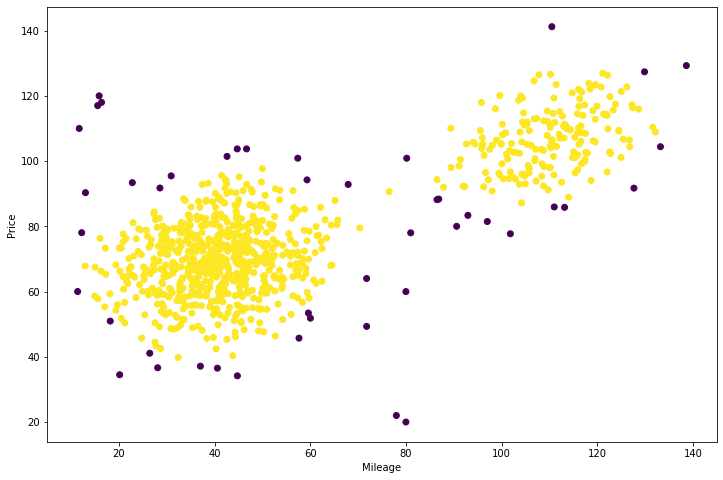

In [23]:
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.05).fit_predict(df.iloc[:, :2])

https://drive.google.com/file/d/1q2-OVnodRqH_UtOL05BWYWQqVUiOXbww/view
df['is_outlier_lof'] = clf
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [16]:
df.head(2)

,Mileage,Price,is_outlier_ee,is_outlier_if,is_outlier_lof
0,64.282388,67.967708,1,1,1
1,27.331911,70.023637,1,1,1
